In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt
from ipywidgets import interact
import sys
from os import path
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

out_dir='cont_data_files/'

# parameters
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3

vF=1e6
B=10 # Tesla
hwc=vF*sqrt(2*hbar*elec*B)
lB=np.sqrt(hbar/(elec*B))


def cond_plotter_vs_E(Nx,Lx,Ls,params):
    
    nu=params['nu']
    m_n=params['m_n']
    mu_sc=params['mu_sc']
    m_sc=params['m_sc']
    
    D1=params['D1']
    D2=params['D2']

    lRx= params['lRx']
    lRy= params['lRy']
    lso= params['lso']
    gs= params['gs']
    gn= params['gn']
    f1='cond_paw_vs_E_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
          (Nx,Lx,Ls,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
           D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
#     f1='cond_vs_E_El_%.3f_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (E_lead,Nx,Lx,Ls,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
    
#     f1='cond_vs_mu_El_%.3f_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (E_lead,Nx,Lx/lB,Ls/lB,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
   
 #     f1='cond_vs_mu_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (Nx,Lx/lB,Ls/lB,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
    fname=out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        Esw=npzfile['E_list']
        Ree=npzfile['Ree']
        Reh=npzfile['Reh']

    return Esw, Ree, Reh

Response as a function of bias

cond_paw_vs_E_Nx_100_Lxs_8_6_nu_1.20_mn_0.06_ms_3.00_mus_8.00_D12_0.30_0.20_lxys_0.20_0.00_0.00_gsn_0.00_0.10.npz


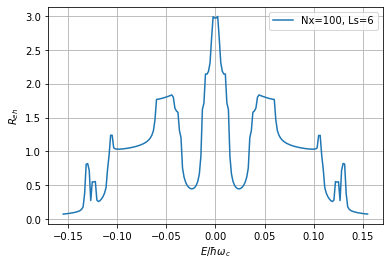

In [30]:
# system dimensions (in units of lB)
Ls=6
Lx=8

D1=0.3*hwc #10*meV
D2=0.2*hwc #10*meV
m_n=0.06*hwc

lRx= 0.2*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.1*hwc

nu_list=[1.2]
m_sc=3*hwc 
mu_sc=8*hwc
params=dict(nu=0,m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)

Nx_list=[100]
for Nx in Nx_list:
# E_list=[0.001,0.01,0.02]
# E_list=[0]
    for nu in nu_list:
        params['nu']=nu
#     E_lead=0
        Esw1, Ree1, Reh1 = cond_plotter_vs_E(Nx,Lx,Ls,params)
#         l= 'Nx=%d, E=%.3f' % (Nx,E_lead)
        l= 'Nx=%d, Ls=%d' % (Nx,Ls)
#             plt.plot(Esw1/hwc,Reh1/Reh1.max(), label=l)
        plt.plot(Esw1/D1,Reh1/1.1, label=l)
#             plt.plot(Esw1/D1,Reh1, label=l)
#         plt.plot(Esw1/D1,(Ree1-Ree1[0]), label=l)



# plt.plot(Esw1/hwc,Reh1)
# plt.plot(Esw1/hwc,Ree1)
plt.legend()
plt.grid()
# plt.ylim(0,1.1)
plt.ylabel(r'$R_{eh}$')
plt.xlabel(r'$E/\hbar\omega_c $')
plt.show()

cond_paw_vs_E_Nx_100_Lxs_8_6_nu_0.30_mn_0.06_ms_3.00_mus_8.00_D12_0.30_0.20_lxys_0.20_0.00_0.00_gsn_0.00_0.10.npz


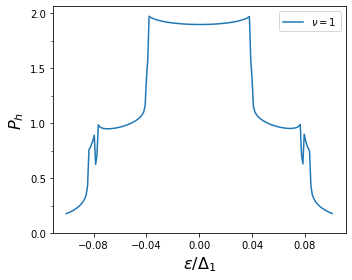

In [7]:
########## plot for the notes
fig, ax = plt.subplots(figsize=(5,4))

for Nx in Nx_list:
# E_list=[0.001,0.01,0.02]
# E_list=[0]
    for nu in nu_list:
        params['nu']=nu
#     E_lead=0
        for Ls in Ls_list:
            Esw1, Ree1, Reh1 = cond_plotter_vs_E(Nx,Lx,Ls,params)
            if nu>0.4: 
                l= r'$\nu=2$'
            else:
                l= r'$\nu=1$'
#             plt.plot(Esw1/hwc,Reh1/Reh1.max(), label=l)
            ax.plot(Esw1/D1,Reh1/0.43, label=l)
    
ax.legend()
fsize=16
plt.ylabel(r"$P_h$",fontsize = fsize)
plt.xlabel(r"$\varepsilon/\Delta_1$",fontsize = fsize)
# plt.ylim(-0.,0.5)
# plt.xlim(-1,4)
plt.xticks(np.arange(-0.08,0.081,0.04))
plt.yticks(np.arange(0,2.1,0.5))
# plt.legend(loc='upper right')

ax.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.tight_layout()
# plt.savefig('figs/CAR_vs_E_Nx_%d.pdf' % (Nx))
plt.show()


Response as a function of nu

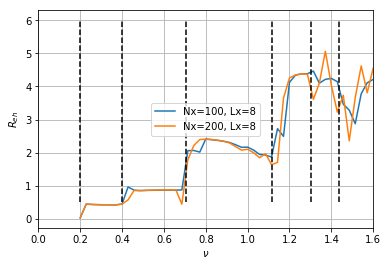

In [7]:
# system dimensions (in units of lB)
Lx_list=[8]
Ls=6

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.1*hwc

lRx= 1.*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.3*hwc

m_sc=3*hwc 
mu_sc=8*hwc
params=dict(m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)

m_sc_lead=1000*hwc
mu_sc_lead=0*hwc
Nx_list=[100,200]
for Nx in Nx_list:
# E_list=[0]
#     for E_lead in E_list:
    E_lead=0
#     for Ls in Ls_list:
    for Lx in Lx_list:
        nusw1, Ree1, Reh1 = cond_plotter_vs_mu(Nx,Lx,Ls,params)
#         l= 'Nx=%d, E=%.3f' % (Nx,E_lead)
#         l= 'Nx=%d, Ls=%d' % (Nx,Ls)
        l= 'Nx=%d, Lx=%d' % (Nx,Lx)
        plt.plot(nusw1,Reh1, label=l)
#         plt.plot(nusw1,-1/(2.3*Reh1), label=l)
#         plt.plot(nusw1,Ree1-Ree1[0], label=l)

Nll=4
ill=np.arange(Nll)
E1=np.reshape(np.sqrt(ill+(m_n/hwc)**2),[1,Nll])
Eplot= np.concatenate((E1,E1),axis=0)
yvals=np.reshape(np.array([0.5,6]),[2,1])
plt.plot( Eplot-gn/hwc,yvals,'k--')
plt.plot( Eplot+gn/hwc,yvals,'k--')
plt.plot( -Eplot-gn/hwc,yvals,'k--')
plt.plot( -Eplot+gn/hwc,yvals,'k--')


# plt.plot(Esw1/hwc,Reh1)
# plt.plot(Esw1/hwc,Ree1)
plt.legend()
plt.grid()
plt.xlim(0,1.6)
# plt.ylim(-1.2,0.1)
plt.ylabel(r'$R_{eh}$')
plt.xlabel(r'$\nu$')
plt.show()

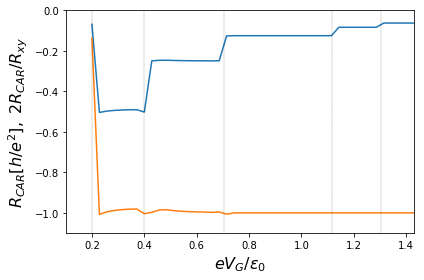

In [104]:
### plot for the notes
# system dimensions (in units of lB)
Lx_list=[8]
Ls=6

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.1*hwc

lRx= 1.*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.3*hwc

m_sc=3*hwc 
mu_sc=8*hwc
params=dict(m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)


Nll=4
ill=np.arange(Nll)
E1=np.reshape(np.sqrt(ill+(m_n/hwc)**2),[1,Nll])

m_sc_lead=1000*hwc
mu_sc_lead=0*hwc
Nx_list=[200]
for Nx in Nx_list:
    E_lead=0
    for Lx in Lx_list:
        nusw1, Ree1, Reh1 = cond_plotter_vs_mu(Nx,Lx,Ls,params)
        Reh1[8]=0.875
        Reh1[17]=0.872
        Reh1[19:33]= 4*0.44
        Reh1[33:39]= 6*0.44
        Reh1[39:44]= 8*0.44
        l= 'Nx=%d, Lx=%d' % (Nx,Lx)
#         plt.plot(nusw1,(Reh1/0.44), label=l)
#         plt.plot(nusw1,-1/(2.3*Reh1), label=l)
#         plt.plot(nusw1,Ree1-Ree1[0], label=l)
    
        

        nu= [0]*5
        nu[0]= np.where(nusw1 > (E1[0][0]-gn/hwc))[0][0]
        nu[1]=np.where(nusw1[nu[0]:] > (E1[0][0]+gn/hwc))[0][0] + nu[0]+1
        nu[2]=np.where(nusw1[nu[1]:] > (E1[0][1]-gn/hwc))[0][0] + nu[1]
        nu[3]=np.where(nusw1[nu[2]:] > (E1[0][2]-gn/hwc))[0][0] + nu[2]
        nu[4]=np.where(nusw1[nu[3]:] > (E1[0][1]+gn/hwc))[0][0] + nu[3]
#         nu[5]=np.where(nusw1[nu[4]:] > (E1[0][2]+gn/hwc))[0][0] + nu[4]

        Z=.0
        fz=(1-4*Z**2 * (Z**2+1) ) /(1+2*Z**2)**2
        y=(Reh1/0.44)*fz
        y_plot= np.zeros(Reh1.shape)
        y_plot[nu[0]:nu[1]]= -y[nu[0]:nu[1]]/(1+y[nu[0]:nu[1]])/1
        y_plot[nu[1]:nu[2]]= -y[nu[1]:nu[2]]/(2+y[nu[1]:nu[2]])/2
        y_plot[nu[2]:nu[3]]= -y[nu[2]:nu[3]]/(4+y[nu[2]:nu[3]])/4
        y_plot[nu[3]:nu[4]]= -y[nu[3]:nu[4]]/(6+y[nu[3]:nu[4]])/6
        y_plot[nu[4]:]= -y[nu[4]:]/(8+y[nu[4]:])/8
        plt.plot(nusw1,y_plot,label='$R_{car}$',color='C0')



        y_plot= np.zeros(Reh1.shape)
        y_plot[nu[0]:nu[1]]= -y[nu[0]:nu[1]]/(1+y[nu[0]:nu[1]])/1
        y_plot[nu[1]:nu[2]]= -y[nu[1]:nu[2]]/(2+y[nu[1]:nu[2]])/1
        y_plot[nu[2]:nu[3]]= -y[nu[2]:nu[3]]/(4+y[nu[2]:nu[3]])/1
        y_plot[nu[3]:nu[4]]= -y[nu[3]:nu[4]]/(6+y[nu[3]:nu[4]])/1
        y_plot[nu[4]:]= -y[nu[4]:]/(8+y[nu[4]:])/1
        plt.plot(nusw1,y_plot*2,label='$2R_{car}/R_{xy}$',color='C1')



#         print(nusw1[nu],nu)
#         print(nusw1[np.ix_([nu0,nu1,nu2,nu3])])
            

Eplot= np.concatenate((E1,E1),axis=0)
yvals=np.reshape(np.array([-1.1,0]),[2,1])
lw=0.2
plt.plot( Eplot-gn/hwc,yvals,'k--',linewidth=lw)
plt.plot( Eplot+gn/hwc,yvals,'k--',linewidth=lw)
plt.plot( -Eplot-gn/hwc,yvals,'k--',linewidth=lw)
plt.plot( -Eplot+gn/hwc,yvals,'k--',linewidth=lw)

ax=plt.axes()
# ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# plt.legend(loc='right')
fsize=16
# plt.ylabel(r"$P_h$",fontsize = fsize)
# plt.ylabel(r"CAR response",fontsize = fsize)
plt.ylabel(r'$R_{CAR}[h/e^2],\ 2R_{CAR}/R_{xy}$',fontsize = fsize)
plt.xlabel(r"$eV_G/\varepsilon_0$",fontsize = fsize)
plt.ylim(-1.1,0)
plt.xlim(0.1,1.43)
# plt.xticks(np.arange(-4,4.1,2))
# plt.yticks(np.arange(0,8.1,2))
# plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figs/car_vs_mu_Z_%.2f.pdf' % (Z))
plt.show()

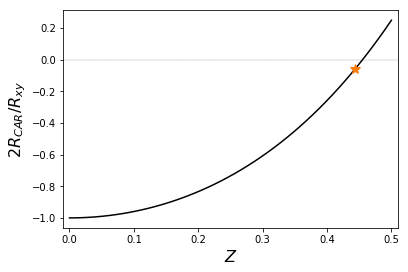

In [108]:
Z_sw=np.linspace(0,.5)
Rcar=(1+2*Z_sw**2)**2-2

plt.figure()
plt.plot(Z_sw,Rcar,'k')
plt.plot((Z_sw-0.1)*10,Rcar*0,'k--',linewidth=lw)
# plt.plot(sqrt(sqrt(1/2)-1/2),0,'ko',markersize=5)
plt.xlim(-0.01,0.51)
plt.plot(0.443,-0.06,'k*',color='C1',markersize=10)
plt.xlabel(r'$Z$',fontsize = fsize)
plt.ylabel(r'$2R_{CAR}/R_{xy}$',fontsize = fsize)
plt.savefig('figs/CAR_vs_Z.pdf')
plt.show()

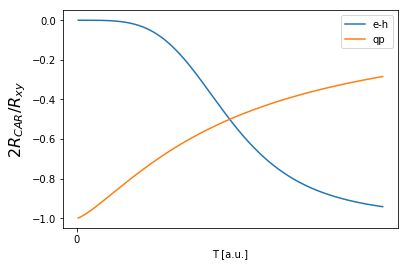

In [109]:
T=np.linspace(0.01,2,1000)
nu=1/3

Vf=T**(2*nu-2)
Vi=T**(2/nu-2)

plt.figure()
# plt.plot(T,-Vi,label='e-h')
# plt.plot(T,-Vf,label='qp')
plt.plot(T,-Vi/(1+Vi),label='e-h')
plt.plot(T,-Vf/(1+Vf),label='qp')
plt.legend()
# plt.ylim(-6,0.2)
plt.ylabel(r'$2R_{CAR}/R_{xy}$',fontsize = fsize)
plt.xlabel('T [a.u.]')
plt.xticks([0])
# plt.savefig('figs/qp_vs_eh.pdf')
plt.show()


In [41]:
### plot for the notes

import plotly.express as px
import plotly.graph_objects as go

# system dimensions (in units of lB)
Lx_list=[8]
Ls=6

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.1*hwc

lRx= 1.*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.3*hwc

m_sc=3*hwc 
mu_sc=8*hwc
params=dict(m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)


# inds=np.arange(0,len(Es))
# # fig = px.scatter(x=inds,y=Es[inds])
# # fig = px.scatter(x=inds,y=-Es[::-1])
# # # # fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
# # fig.show()

fig = go.Figure()

Nx_list=[100,200]
for Nx in Nx_list:
    E_lead=0
    for Lx in Lx_list:
        nusw1, Ree1, Reh1 = cond_plotter_vs_mu(Nx,Lx,Ls,E_lead,params)
        l= 'Nx=%d, Lx=%d' % (Nx,Lx)
#         plt.plot((Reh1/0.44), label=l)
        Reh1[17]=0.872
        Reh1[19:34]= 4*0.44
        Reh1[34:40]= 6*0.44
        fig.add_trace(go.Scatter(y=(Reh1/0.44),
                            mode='markers',marker_size=10,
                            name='E'))

fig.show()


# plt.grid()
# plt.show()